### Loading the dataset

The dataset can be loaded from MySQL DB which is running in separate container.
If it is not available it can be alternatively loaded from existing CSV file.

In [49]:
import pandas as pd
import mysql.connector
from sqlalchemy import types, create_engine

# Set unlimited table view
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# MySQL Connection
MYSQL_USER = 'root'
MYSQL_PASSWORD = open('/run/secrets/db-password').read().strip()
MYSQL_HOST_IP = 'db'
MYSQL_PORT = 3306
MYSQL_DATABASE = 'example'

engine = create_engine(f'mysql+mysqlconnector://{MYSQL_USER}:{MYSQL_PASSWORD}@{MYSQL_HOST_IP}:{MYSQL_PORT}/{MYSQL_DATABASE}', echo=False)

df = pd.read_sql_table('museums', engine.connect()).drop(labels=['index'], axis=1)

#df = pd.read_csv('sample.csv').drop(['Unnamed: 0'], axis=1)

In [50]:

df

,Museum,Museum Wiki,Museum Wikidata ID,Country,Country Wiki,Country Wikidata ID,City,City Wiki,City Wikidata ID,Visitors per year,City population,Country population,Wiki languages count,Continent,Museum types,Art/culture museum
0,Louvre,/wiki/Louvre,Q19675,France,/wiki/France,Q142,Paris,/wiki/Paris,Q90,9600000,2187526,66628000,152,Europe,"art museum, museum of culture, museum",1
1,National Museum of China,/wiki/National_Museum_of_China,Q1074318,China,/wiki/China,Q148,Beijing,/wiki/Beijing,Q956,7390000,21710000,1409517397,30,Asia,"national museum, museum",0
2,Vatican Museums,/wiki/Vatican_Museums,Q182955,Vatican City,/wiki/Vatican_City,Q237,Vatican City,/wiki/Vatican_City,Q237,6882931,1000,1000,56,Europe,"art museum, national museum, museum of culture...",1
3,Metropolitan Museum of Art,/wiki/Metropolitan_Museum_of_Art,Q160236,United States,/wiki/United_States,Q30,New York City,/wiki/New_York_City,Q60,6479548,8398748,325145963,75,North America,"art museum, museum of culture, museum",1
4,British Museum,/wiki/British_Museum,Q6373,United Kingdom,/wiki/United_Kingdom,Q145,London,/wiki/London,Q84,6239983,8908081,66022273,92,Europe,"national museum, museum",0
5,Tate Modern,/wiki/Tate_Modern,Q193375,United Kingdom,/wiki/United_Kingdom,Q145,London,/wiki/London,Q84,6098340,8908081,66022273,53,Europe,"art museum, museum of culture, museum",1
6,National Gallery,/wiki/National_Gallery,Q180788,United Kingdom,/wiki/United_Kingdom,Q145,London,/wiki/London,Q84,6011007,8908081,66022273,64,Europe,"art museum, museum of culture, museum",1
7,Natural History Museum,"/wiki/Natural_History_Museum,_London",Q309388,United Kingdom,/wiki/United_Kingdom,Q145,London,/wiki/London,Q84,5424000,8908081,66022273,50,Europe,"science museum, natural history museum, nation...",0
8,American Museum of Natural History,/wiki/American_Museum_of_Natural_History,Q217717,United States,/wiki/United_States,Q30,New York City,/wiki/New_York_City,Q60,5000000,8398748,325145963,48,North America,"science museum, natural history museum, histor...",0
9,State Hermitage Museum,/wiki/State_Hermitage_Museum,Q132783,Russia,/wiki/Russia,Q159,Saint Petersburg,/wiki/Saint_Petersburg,Q656,4956529,5351935,146804372,75,Europe,"art museum, museum of culture, museum",1


### Exploring the dataset

Let's explore the dataset with drawing multiple scatterplots showing correlation between different numerical features we have extracted.

To add more information we also divide the dataset between museums displaying pieces of art and the rest (military museums, engineering museums etc.)

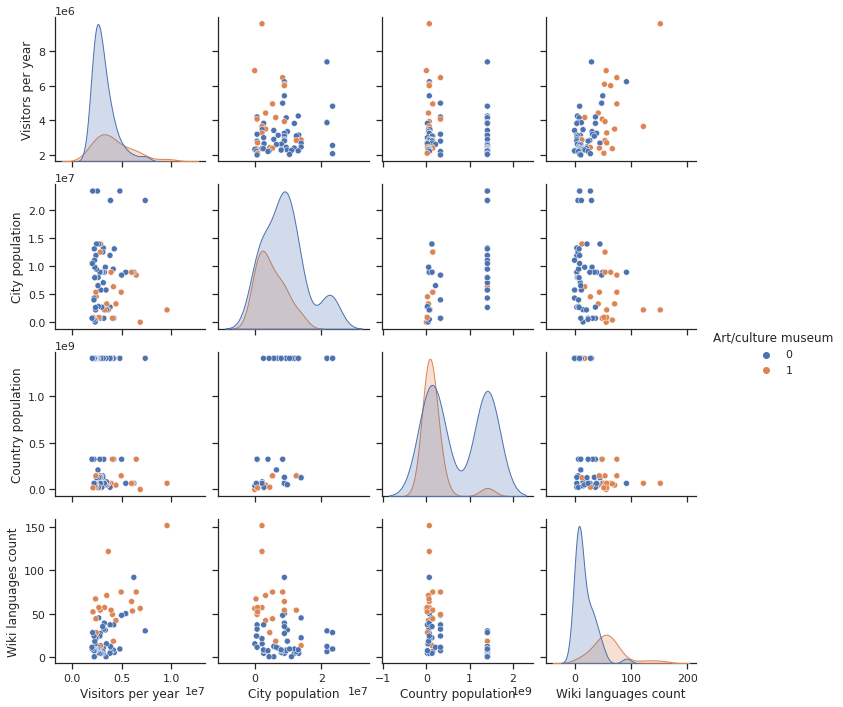

In [51]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(df, hue="Art/culture museum");

### Predicting number of visitors by city population

In following experiment we are trying to find whether we could predict the yearly number of visitors of museum using the population of the city where museum resides.

First we build simple linear regression model.

In [52]:
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df[['City population']].values.reshape(-1, 1) 
X_train, X_test, y_train, y_test = train_test_split(X, df['Visitors per year'], random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

x_range = np.linspace(X.min(), X.max(), 100)
y_range = model.predict(x_range.reshape(-1, 1))

# Uncomment and run for detailed statistics about the learned model
# from statsmodels.api import OLS
# OLS(y_test.values,model.predict(X_test)).fit().summary()

### Visualizing the model

We can now show the testing and training set in scatter plot to observe how precise is our predictor

In [53]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter(df, y='Visitors per year', x='City population')

fig.add_traces(go.Scatter(x=X_train.squeeze(), y=y_train, name='train', mode='markers'))
fig.add_traces(go.Scatter(x=X_test.squeeze(), y=y_test, name='test', mode='markers'))
fig.add_traces(go.Scatter(x=x_range, y=y_range, name='prediction'))

fig.update_traces(marker=dict(size=12, line=dict(width=2, color='DarkSlateGrey')), selector=dict(mode='markers'))

fig.show()

### Looking for better features

What could be better way to predict the number of the visitors?
Let's observe another feature - number of different languages for which a page exists for given museum.

We will draw the complete dataset with museums grouped by continent.

We can see that the predictors show some similar tendency, but still are quite inaccurate.

Observe different precision of the linear models for Asia/Europe and North America. 

In [54]:
import plotly.express as px

fig = px.scatter(df, y='Visitors per year', x='Wiki languages count', hover_data=['Museum', 'City'], color='Continent', trendline="ols")
fig.update_traces(marker=dict(size=12,line=dict(width=2, color='DarkSlateGrey')), selector=dict(mode='markers'))
fig.show()